In [1]:
import json
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# read the data
data = pd.read_csv("../results/inf_outf.csv", index_col=0)
# convert index to datetime
data.index = pd.to_datetime(data.index)

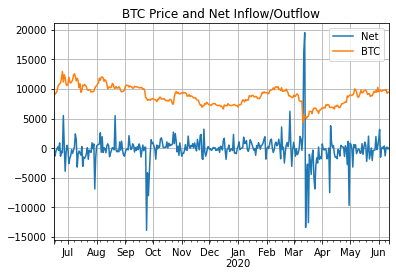

In [3]:
# let's look at inflow/outflow and price
data.drop(columns=["volume", "inflow", "outflow"]).plot()
plt.title("BTC Price and Net Inflow/Outflow")
plt.legend(["Net", "BTC"])
plt.grid(True)

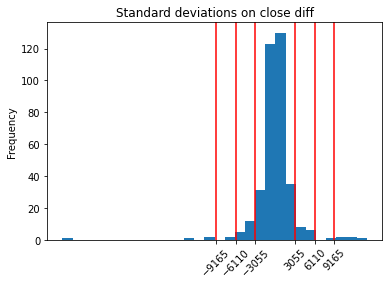

In [4]:
# calculate the daily change
diff = data.net.diff()
# the standard deviation in daily change
s = diff.std()

# let's observe the variances in change in net in/out
diff.plot.hist(bins=30)
for i in range(3):
    plt.axvline(s*(1+i), color='r')
    plt.axvline(s*(-(i+1)), color='r')
    
plt.title("Standard deviations on close diff")
plt.xticks([s*(-(1+i)) for i in reversed(range(3))] + [s*(1+i) for i in range(3)], rotation=45)
#plt.xlim(-20000, 20000)
plt.show()

In [5]:
sigma = 3*s      # what we consider anomolous inflow/outflow

# calculating days of large than average net flow
data["net_diff"] = data.net.diff().fillna(0)
data["anom"] = np.where(abs(data.net_diff) > sigma, 1, 0)

print("{:.3f}".format(100*(1-sum(data.anom)/len(data))) + "% non-anomolous days")

97.521% non-anomolous days


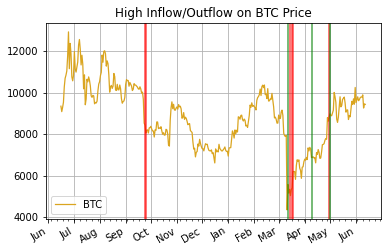

In [6]:
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b')
weeks = mdates.WeekdayLocator()

fig, ax = plt.subplots()

ax.plot(data.close, color="goldenrod", lw=1.25)

# add the high inflow/outflow days
for i in data.index[data.anom==1]:
    if data.loc[i].net > 0:
        ax.axvline(i, color='g', alpha=0.7)
    else:
        ax.axvline(i, color='r', alpha=0.7)
    
# set the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(weeks)

# add grid
ax.grid(True)
ax.set_title("High Inflow/Outflow on BTC Price")
# format ticks
fig.autofmt_xdate()
ax.legend(["BTC"])
plt.show()

Drill down w/ activity data on the weeks of high inflows  
Does the data show account tranfers at once a day  
Sign up for Cryptosheets

### Now, on to the Activity Data

In [7]:
with open("../results/tot_activity.json", "r") as f:
    inp = f.read()
    
act = json.loads(inp)

In [59]:
def format_activity(d):
    df = pd.DataFrame(res).reset_index()
    time = pd.to_numeric(df["index"])
    df.index = [datetime.fromtimestamp(t//10**3) for t in time]
    df = df.drop(["index"], axis=1)
    return df

In [60]:
all_activity = {key: format_activity(val) for key, val in act.items() if val}

In [61]:
all_activity

{'3BMEXuQhzt1aE4cghg9peRj6eY3LB3NWYU':                      inflow  outflow
 2019-06-16 17:48:58     0.0      0.0
 2019-06-17 17:48:58     0.0      0.0
 2019-06-18 17:48:58     0.0      0.0
 2019-06-19 17:48:58     0.0      0.0
 2019-06-20 17:48:58     0.0      0.0
 ...                     ...      ...
 2020-06-10 17:48:58     0.0      0.0
 2020-06-11 17:48:58     0.0      0.0
 2020-06-12 17:48:58     0.0      0.0
 2020-06-13 17:48:58     0.0      0.0
 2020-06-14 17:48:58     0.0      0.0
 
 [365 rows x 2 columns],
 '3BMEXG7TBnwpWXiD44VWqNQGQoas4YZKFL':                      inflow  outflow
 2019-06-16 17:48:58     0.0      0.0
 2019-06-17 17:48:58     0.0      0.0
 2019-06-18 17:48:58     0.0      0.0
 2019-06-19 17:48:58     0.0      0.0
 2019-06-20 17:48:58     0.0      0.0
 ...                     ...      ...
 2020-06-10 17:48:58     0.0      0.0
 2020-06-11 17:48:58     0.0      0.0
 2020-06-12 17:48:58     0.0      0.0
 2020-06-13 17:48:58     0.0      0.0
 2020-06-14 17:48:58   